# Linear Algebra (CpE210A)

## Laboratory 2: Plotting Vectors using NumPy and MatPlotLib

Coded and submitted by

Columba, Lorenzo Miguel L.

58010

### Lab Exercises

# Part 1:  Skyline Eagle Fly

You are tasked to make a tracking device for Philippine Eagles at the Philippine Eagle Center at Davao. The tracker sensors only give the longitudinal and latitudinal distance (meters) of the eagle's position relative to their nests which we will treat as the origin of the tracking view. We want to determine the relative displacement of the eagle from its nest. It is expected that the eagles will change exactly two times, it can then be assumed that the program will show three displacements. Please make a prototype code using the additional information given below:

(Eq.1) dist total $= (long total$)$\hat{x}$ + $(lattotal$)$\hat{y}$

(Eq.2) disp = $\sqrt{distx^2 + disty^2} $

(Eq.3) $\theta$ = ${tan^-1}$ $(\alpha$ +$\frac{y}{x}) $

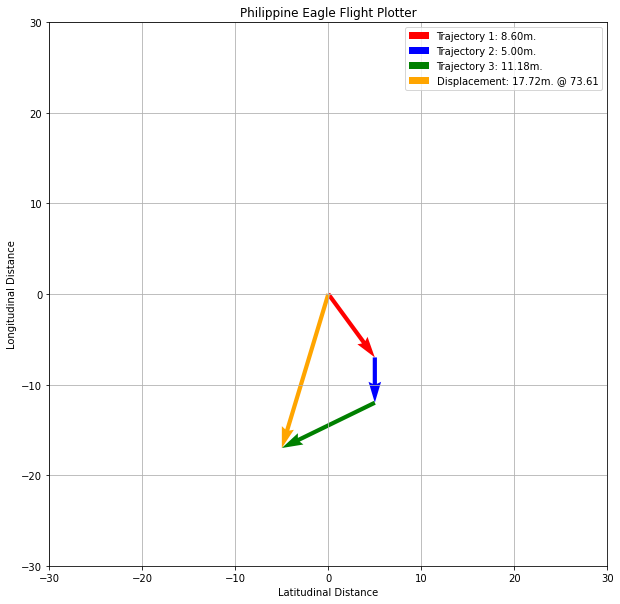

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
def track_eagle(make_figs=True):
    long = np.random.randint(-10,10, size=3)
    lat = np.random.randint(-10,10, size=3)
    dist1  = np.array([lat[0], long[0]])                            
    dist2  = np.array([lat[1], long[1]])  
    dist3  = np.array([lat[2], long[2]])  

    dist_test_1_2 = np.add(dist1,dist2)
    dist_total = np.add(dist_test_1_2,dist3)
    disp = np.sqrt ((dist_total[0]**2) + (dist_total[1]**2))
    alpha = 10**-6
    theta =  np.arctan(dist_total[1]/(alpha+ dist_total[0]))
    theta = np.degrees(theta)
    
    n=2
    plt.figure(figsize=(10,10))
    plt.title('Philippine Eagle Flight Plotter')
    plt.xlim(-30, 30)
    plt.ylim(-30, 30)
    plt.xlabel('Latitudinal Distance')
    plt.ylabel('Longitudinal Distance')
    plt.grid()
    

    
    plt.quiver(0,0, dist1[0], dist1[1], 
               angles='xy', scale_units='xy',scale=1, color='red', 
               label='Trajectory 1: {:.2f}m.'.format(np.linalg.norm(dist1)))
    plt.quiver(dist1[0], dist1[1], dist2[0], dist2[1], 
               angles='xy', scale_units='xy',scale=1, color='blue',
              label='Trajectory 2: {:.2f}m.'.format(np.linalg.norm(dist2)))
    plt.quiver(np.add(dist1[0],dist2[0]), np.add(dist1[1],dist2[1]),
               dist3[0], dist3[1], angles='xy', scale_units='xy',scale=1, color='green',
              label='Trajectory 3: {:.2f}m.'.format(np.linalg.norm(dist3)))
    plt.quiver(0,0, dist_total[0], dist_total[1], 
               angles='xy', scale_units='xy',scale=1, color='orange',
              label='Displacement: {:.2f}m. @ {:.2f}'.format(disp, theta))
    
    plt.legend()
    
    if make_figs:
        plt.savefig(f'LinAlg-Lab2-PH Eagle-{int(disp)}@{int(theta)}.png', dpi=300)
    
    plt.show()
track_eagle(make_figs=False)

### Guide questions:

1.What is the use of the variable  α ?

The alpha variable use to set the present axes of objects and to avoid the error within the program .

2.Kindly explain the process of plotting the eagle flight vectors.

Function quiver plots the vectors as arrows with the coordinates of x and y. The matrices of the x, y, u, and v ought to be all equal in size. U and v correspond to the direction of the arrows to every flight. There 4 quivers within the problem, the first trajectory described by the red arrow, the second trajectory is that the arrow blue, the third trajectory is the green arrow and also the total displacement is the orange arrow. The 3 displacements are connected to each different and it's all added along to urge the coordinates of the entire displacement of the eagle’s flight. The values of the 3 displacements for the meridian and latitude are indiscriminately generated. The operate angles = XY, scale_units = xy generated to plot the vectors within the x and y plane with its units. plt.legend represents its axis and its label. Plt.show() function can show all the plotting of the eagle’s flight.

3.Provide a flow chart describing the 'track_eagle' function.

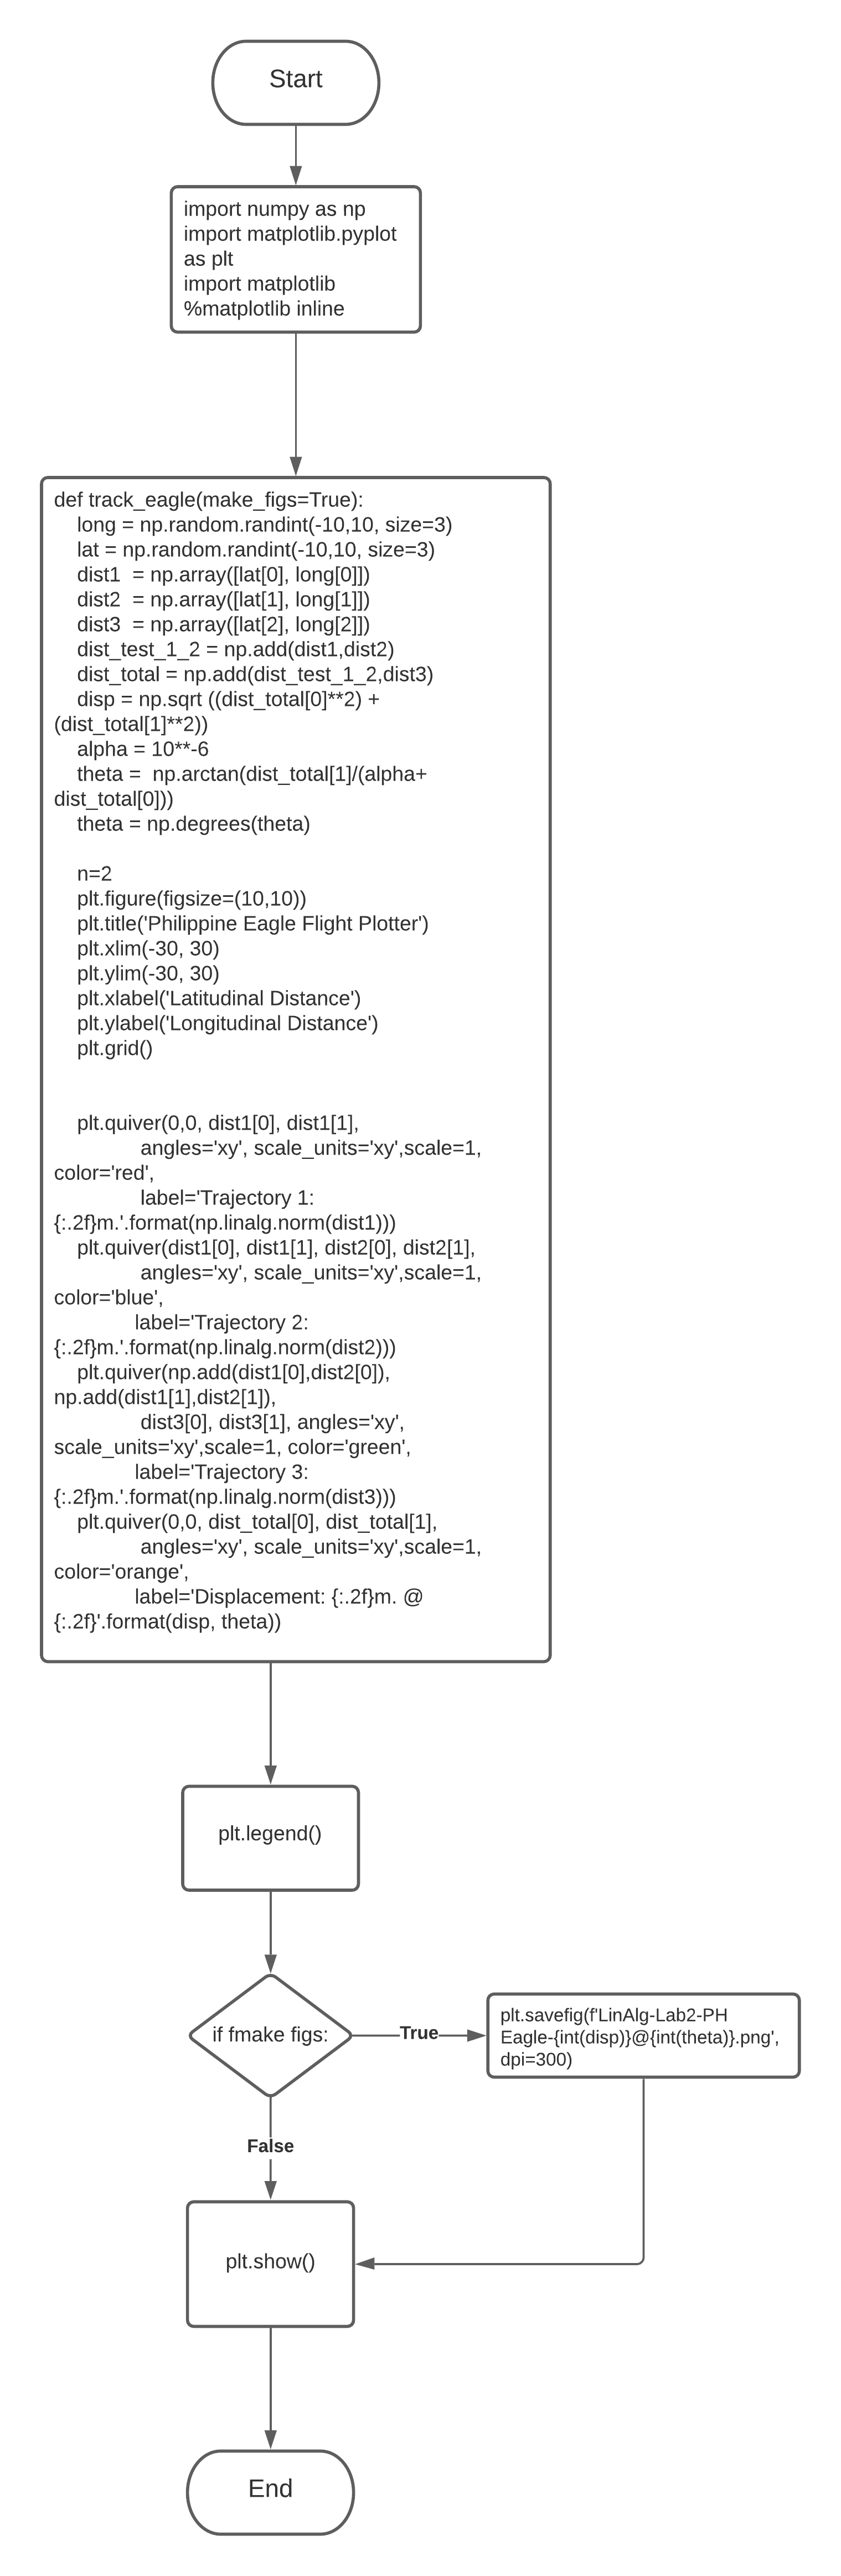

## Part 2: Reverse Engineering

Your project manager found out that the previous engineer that handled the project did some sort of algorithm regarding the eagles. He gave you the piece code for you to analyze and required you to make a documentation out of it. The code is given below

In [ ]:
import numpy as np
def eagle_kinematics(eagle_position, time):
    
    req_shape = 4
    eagle_velocity = np.zeros((req_shape-1,))
    eagle_acceleration =  np.zeros((req_shape-2,))
    eagle_total_vector = np.array([res**3, res**2, res, 1])
    
    if eagle_position.shape == (req_shape,):
        eagle_velocity= np.array([3*eagle_position[0],2*eagle_position[1], eagle_position[2]])
        eagle_acceleration  = np.array([2*eagle_velocity[0],eagle_velocity[1]])
        eagle_total_position = np.sum(np.multiply(eagle_position,eagle_total_vector))
        eagle_total_velocity = np.sum(np.multiply( eagle_velocity, eagle_total_vector[1:]))
        eagle_total_acceleration = np.sum(np.multiply(eagle_acceleration, eagle_total_vector [2:]))
        
    else:
        print(f'Input displacement vector is not valid. Make sure that the vector shape is ({req_shape},)')
    
    return eagle_total_position, eagle_total_velocity , eagle_total_acceleration


pst = np.array([2,1,3,2])
res = 2
print("Eagle kinematics:",eagle_kinematics(pst,res))

Eagle kinematics: (28, 31, 26)


### Guide questions:

1.What is the function for? Explain the inputs,process, functions used, and the outputs.

Functions in eagle_kinematics is to get the eagle_total_postion, eagle_total_velocity, and therefore the eagle_total_acceleration. I assigned pst and res for the input eagle_position and time. Multiply the arrays of ([8,4,2,1] and [2,1,3,2]) is appreciate the total of [16,4,6,2] is equivalent to 28. the method in obtaining the eagle_total_position of the eagle’s flight, followed by its eagle_total_velocity it multiplies the arrays of ([4,2,1] and [6,2,3]) is equivalent to the sum of [24,4,3] that may be equivalent to 31, whereas the eagle_total_acceleration multiply the weather within the arrays ([2,1] and [12,2]) is equivalent to the sum of [24,2] that will be equivalent to 26. importation numpy as np can use the function np.array(), used to produce and store arrays. np.multiply(), used to multiply the corresponding elements. np.sum(), is employed to urge all the results of arrays from the axis. For the last function np.zeros() used to come to all or any arrays that store zeroes.

2.Kindly provide equations for $st$, $vt$ , and  $at$  basing on their code.

$st$ = sum of $\begin{bmatrix} eagleposition[:] \end{bmatrix} $ x $\begin{bmatrix} eagletotalvector[:] \end{bmatrix} $

$vt$ = sum of $\begin{bmatrix} eaglevelocity[:] \end{bmatrix} $ x $\begin{bmatrix} eagletotalvector[1:] \end{bmatrix} $

$at$ = sum of $\begin{bmatrix} eagleacceleration[:] \end{bmatrix} $ x $\begin{bmatrix} eagletotalvector[2:] \end{bmatrix} $

## Part 3: Bebang's Online Business

You have a friend named Bebang who has an online business in which she sells donuts. She asks you to make something that helps her to observe the increase and decrease of her profit considering the reach of her online posts. As novice data analytic engineers, you suggest to make a plotter using vectors of her weekly profit and FB post reach for a month. She is amazed that you have this idea and will pay you 15,000 PHP for the program. Thus you venture in implementing your idea with the PH Eagle Tracker as the base code.

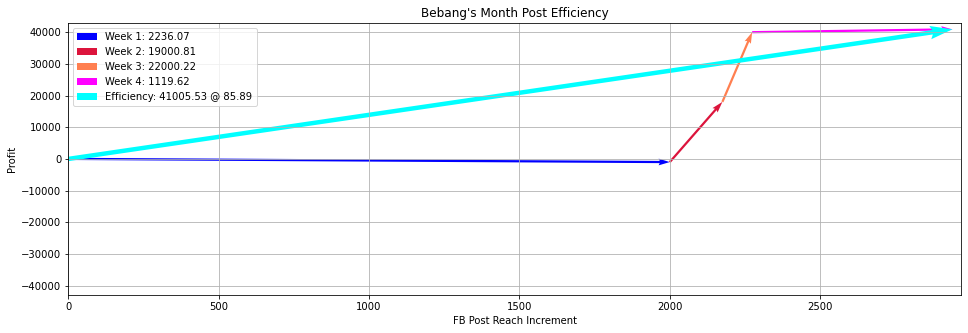

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
def month_profit_trace(profit, reach, make_figs=True): 
    if (profit.shape == (4,)) and (reach.shape == (4,)): 
        week1 = np.array((reach[0], profit[0]))       
        week2 = np.array((reach[1], profit[1]))
        week3 = np.array((reach[2], profit[2]))
        week4 = np.array((reach[3], profit[3]))
        
        week_1_2 = np.add(week1,week2)
        week_3_4 =np.add(week3,week4)
        week_total = np.add(week_1_2,week_3_4)  
        week_performance =np.sqrt ((week_total[0]**2) + (week_total[1]**2))
        alpha = 10**-6
        reach_gradient = np.arctan((week_total[1]) / (alpha + week_total[0]))    
        reach_gradient = np.degrees(reach_gradient)                          
        

        plt.figure(figsize=(16,5))
        plt.title('Bebang\'s Month Post Efficiency')
        plt.xlim(0,1.01*np.sum(reach))
        plt.ylim(-np.sum(np.abs(profit)),np.sum(np.abs(profit)))
        plt.xlabel('FB Post Reach Increment')
        plt.ylabel('Profit')
        plt.grid()
        n = 2
        
       
        plt.quiver(0,0, week1[0], week1[1], 
                   angles='xy', scale_units='xy',scale=1, color='blue', width=0.0025,
                   label='Week 1: {:.2f}'.format(np.linalg.norm(week1)))
        
        plt.quiver(week1[0], week1[1], week2[0], week2[1], 
                   angles='xy', scale_units='xy',scale=1, color='crimson', width=0.0025, 
                   label='Week 2: {:.2f}'.format(np.linalg.norm(week2)))
      
        plt.quiver((week1[0] + week2[0]), (week1[1] + week2[1]), week3[0], week3[1], 
                   angles='xy', scale_units='xy',scale=1, color='coral', width=0.0025, 
                   label='Week 3: {:.2f}'.format(np.linalg.norm(week3)))
        
        plt.quiver((week1[0] + week2[0] + week3[0]), (week1[1] + week2[1] + week3[1]), week4[0], week4[1], 
                   angles='xy', scale_units='xy',scale=1, color='magenta', width=0.0025, 
                   label='Week 4: {:.2f}'.format(np.linalg.norm(week4)))
             
        
   
        plt.quiver(0,0, week_total[0], week_total[1], 
                   angles='xy', scale_units='xy',scale=1, color='cyan', width=0.005, 
                   label='Efficiency: {:.2f} @ {:.2f}'.format(week_performance, reach_gradient))

        plt.legend(loc='upper left')

        if make_figs:
            plt.savefig(f'LinAlg-Lab2-Bebang Post Eff-{int(week_performance)}@{int(reach_gradient)}.png', dpi=300)

        plt.show()
    
    else:
        print('Dimension error') 


profit= np.array([-1000, 19000, 22000, 900])    
reach = np.array([2000, 175, 99, 666])          

month_profit_trace(profit,reach, make_figs= False) 

### Guide questions:

1.What is the relationship between the FB post reach and the profit?

 FB reach and profit is similar to efficiency. So, if the FB post reaches tons of individuals in social media her profit can gain in addition as efficiency.  

2.Why is profit in the y-axis and FB post reach on the x-axis and not the other way around?


Because if we tend to interchanged the x and y axis within the graph, it'll be hard to scan or it can’t be understandable at all. we are able to assume that the FB post reach can only have positive values and generally it can only have low values however can’t go any than negative values whereas the profit can have negative values. it'll have an effect on the flow of the direction described by the arrows in the graph.

3.Kindly explain the process of plotting the post efficiency vectors.

The method of plotting the post efficiency vectors is that the same process with the first problem the only difference is the inputted name that may be a week and it's added another two variables which are the week three and 4. Also, the grid is totally different from the first problem, and its x and y-axis.

4.Provide a necessary equations that are representative to finding the $performance$$week$ and $reach$$gradient$ 


performance_week $ = \sqrt{week total[0]^2 + week total[1]^2}$

reach gradient $= tan^-1(\alpha+(week total[1]/week total[0])$

5.Try to alter the 'reach' and 'profit' values to display different scenarios. Save at least 3 scenarios then append and discuss the figures in your report.

##### First Scenario: 
Increase in reach and profit =  increase in efficiency 

##### Second Scenario:
Decrease in reach and profit = decrease in efficiency


##### Third Scenario: 
Increase in reach and profit =  increase in efficiency 

6.What can be observed and concluded with the behavior of the vectors with respect to post efficienc

Every time the FB reach post and profit increases or decreases, it will be the same to efficiency. Therefore, the behavior of the vectors in the graph are connected to FB reach post and profit that will result to its efficiency as well. 